# Web Scraping Data from (BLS)

As of 2020/09/30
<ul>
  <li>Successfully scrapped data</li>
  <li>Currently cleanning data</li>
  <li>Need to decide on a data science project to accomplish with data</li>
</ul>

As of 2020/10/01
<ul>
  <li></li>
</ul>

In [2]:
import requests 
from bs4 import BeautifulSoup
import string
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

base_url = "https://www.bls.gov"
url = "https://www.bls.gov/ooh/a-z-index.htm"

# Getting a list of every URL I need to scrape from (2404 links in total)

In [2]:
# Keeping track of time
start_time = time.time()

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
#print(soup.prettify())
all_a_tags = list(soup.find_all("a"))
ooh_a_tags = []
for tag in all_a_tags:
    # PRINTER-FRIENDLY: Weird thing to have to explicitly filter for
    if tag.get('href') == '/ooh/print/a-z-index.htm':
        pass
    elif tag.get('href')[:5] == '/ooh/':
        ooh_a_tags.append(tag)
        #print(tag)
        
# print(len(all_a_tags))
# print(len(ooh_a_tags))
ooh_a_tags = list(set(ooh_a_tags))
print(len(ooh_a_tags))

print("--- %s seconds ---" % (time.time() - start_time))

2404
--- 0.787531852722168 seconds ---


# Going through each link and extracting the quickfacts table (620 seconds)

<ul>
  <li>https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution</li>
  <li>https://stackoverflow.com/questions/56967976/convert-html-table-to-pandas-data-frame-in-python</li>
</ul>

In [20]:
cols = ['URL', '2019 Median Pay', 'Typical Entry-Level Education', 'Work Experience in a Related Occupation', 'On-the-job Training', 'Number of Jobs, 2019', 'Job Outlook, 2019-29', 'Employment Change, 2019-29']
data = pd.DataFrame(columns=cols)

# Keeping track of time
start_time = time.time()
for tag in ooh_a_tags:
    url_ = base_url + tag.get('href')
    r_ = requests.get(url_)
    soup_ = BeautifulSoup(r_.text, 'html.parser')
    
    try:
        #<table class="regular-text tooltips" id="quickfacts">
        table_ = soup_.find("table", { "id" : "quickfacts" })
        df_ = pd.read_html(str(table_))[0]

        dict_ = {}
        dict_["Job_Title"] = tag.text
        dict_["URL"] = url_
        for index, row in df_.iterrows():
            dict_[ row[df_.columns[0]] ] = row[df_.columns[1]]

        data = data.append(dict_, ignore_index=True)
    except ValueError:
        print("{:=^100}".format(""))
        print("ValueError: skipping link for {}".format(tag.text))
        print("\t", url_)
        continue
print("--- %s seconds ---" % (time.time() - start_time))
        

display( data )

ValueError: skipping link for     OOH HOME
	 https://www.bls.gov/ooh/home.htm
ValueError: skipping link for Occupational Outlook Handbook
	 https://www.bls.gov/ooh/
ValueError: skipping link for Military careers
	 https://www.bls.gov/ooh/military/military-careers.htm
ValueError: skipping link for     Occupational Outlook Handbook
	 https://www.bls.gov/ooh/home.htm
ValueError: skipping link for 


	 https://www.bls.gov/ooh/
ValueError: skipping link for     A-Z INDEX
	 https://www.bls.gov/ooh/a-z-index.htm
ValueError: skipping link for     OCCUPATION FINDER
	 https://www.bls.gov/ooh/occupation-finder.htm
ValueError: skipping link for     OOH FAQ
	 https://www.bls.gov/ooh/about/ooh-faqs.htm
ValueError: skipping link for www.bls.gov/ooh
	 https://www.bls.gov/ooh/home.htm
ValueError: skipping link for     OOH SITE MAP
	 https://www.bls.gov/ooh/ooh-site-map.htm
ValueError: skipping link for     OOH GLOSSARY
	 https://www.bls.gov/ooh/about/glossary.htm
--- 595.2726519107819 seconds ---


,URL,2019 Median Pay,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Job Outlook, 2019-29","Employment Change, 2019-29",Job_Title
0,https://www.bls.gov/ooh/arts-and-design/craft-...,"$48,760 per year $23.44 per hour",See How to Become One,None,Long-term on-the-job training,51900,0% (Little or no change),100,Portrait artists
1,https://www.bls.gov/ooh/management/human-resou...,"$116,720 per year $56.11 per hour",Bachelor's degree,5 years or more,None,165200,6% (Faster than average),10400,Personnel directors
2,https://www.bls.gov/ooh/management/farmers-ran...,"$71,160 per year $34.21 per hour",High school diploma or equivalent,5 years or more,None,952300,-6% (Decline),-61600,Nursery managers
3,https://www.bls.gov/ooh/management/postseconda...,"$95,410 per year $45.87 per hour",Master's degree,Less than 5 years,None,190500,4% (As fast as average),7100,College registrars
4,https://www.bls.gov/ooh/construction-and-extra...,"$36,000 per year $17.31 per hour",See How to Become One,None,Short-term on-the-job training,1643900,5% (Faster than average),81000,Building carpenter helpers
...,...,...,...,...,...,...,...,...,...
2388,https://www.bls.gov/ooh/office-and-administrat...,"$35,390 per year $17.01 per hour",See How to Become One,None,See How to Become One,1465800,-3% (Decline),-38000,Resort desk clerks
2389,https://www.bls.gov/ooh/office-and-administrat...,"$40,540 per year $19.49 per hour",High school diploma or equivalent,None,See How to Become One,1343400,0% (Little or no change),3500,Human resources administrative assistants
2390,https://www.bls.gov/ooh/production/assemblers-...,"$33,710 per year $16.21 per hour",High school diploma or equivalent,None,Moderate-term on-the-job training,1883700,-11% (Decline),-204300,Team assembly line machine operators
2391,https://www.bls.gov/ooh/construction-and-extra...,"$46,500 per year $22.35 per hour",See How to Become One,None,See How to Become One,302100,-3% (Decline),-10000,Onyx-chip terrazzo workers


In [4]:
#data.to_csv("CSV/BLS_jobs_data.csv", index=False)
df = pd.read_csv("../CSV/BLS_jobs_data.csv")

display(df)

,URL,2019 Median Pay,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Job Outlook, 2019-29","Employment Change, 2019-29",Job_Title
0,https://www.bls.gov/ooh/arts-and-design/craft-...,"$48,760 per year $23.44 per hour",See How to Become One,None,Long-term on-the-job training,51900,0% (Little or no change),100,Portrait artists
1,https://www.bls.gov/ooh/management/human-resou...,"$116,720 per year $56.11 per hour",Bachelor's degree,5 years or more,None,165200,6% (Faster than average),10400,Personnel directors
2,https://www.bls.gov/ooh/management/farmers-ran...,"$71,160 per year $34.21 per hour",High school diploma or equivalent,5 years or more,None,952300,-6% (Decline),-61600,Nursery managers
3,https://www.bls.gov/ooh/management/postseconda...,"$95,410 per year $45.87 per hour",Master's degree,Less than 5 years,None,190500,4% (As fast as average),7100,College registrars
4,https://www.bls.gov/ooh/construction-and-extra...,"$36,000 per year $17.31 per hour",See How to Become One,None,Short-term on-the-job training,1643900,5% (Faster than average),81000,Building carpenter helpers
...,...,...,...,...,...,...,...,...,...
2388,https://www.bls.gov/ooh/office-and-administrat...,"$35,390 per year $17.01 per hour",See How to Become One,None,See How to Become One,1465800,-3% (Decline),-38000,Resort desk clerks
2389,https://www.bls.gov/ooh/office-and-administrat...,"$40,540 per year $19.49 per hour",High school diploma or equivalent,None,See How to Become One,1343400,0% (Little or no change),3500,Human resources administrative assistants
2390,https://www.bls.gov/ooh/production/assemblers-...,"$33,710 per year $16.21 per hour",High school diploma or equivalent,None,Moderate-term on-the-job training,1883700,-11% (Decline),-204300,Team assembly line machine operators
2391,https://www.bls.gov/ooh/construction-and-extra...,"$46,500 per year $22.35 per hour",See How to Become One,None,See How to Become One,302100,-3% (Decline),-10000,Onyx-chip terrazzo workers


# Cleaining Data (1)
<ul>
  <li>Reformatting 2019 Median Pay from object (LaTeX) to string</li>
  <li>Splitting 2019 Median Pay into Yearly_Rate and Hourly_Rate</li>
  <li>Dropping 2019 Median Pay column</li>
</ul>

In [5]:
def clean_pay(s):
    s = s.replace(" per", "")
    s = s.replace(" year", "")
    s = s.replace(" hour", "")
    s = s.replace("$", "")
    s = s.replace(",", "")
    s = s.split("  ")

    return s
    
df["2019 Median Pay"] = df["2019 Median Pay"].astype('str')

temp_df = pd.DataFrame(df["2019 Median Pay"].apply(clean_pay).tolist(),
                                  columns = ["Yearly_Wage","Hourly_Wage"])

df["Yearly_Wage"] = temp_df["Yearly_Wage"]
df["Hourly_Wage"] = temp_df["Hourly_Wage"]

df.drop(columns=["2019 Median Pay"], inplace=True)

# display(df)

# Cleaning Data (2)
<ul>
  <li>Reformatting Job Outlook, 2019-29 into two columns</li>
  <li>New column names: Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription</li>
  <li>Dropping Job Outlook, 2019-29 column</li>
</ul>
[Helpful Regex line](https://stackoverflow.com/questions/38999344/extract-string-within-parentheses-python)

In [6]:
import re

def clean_outlook(s):
    s = s.split("%")
    s[0] = int(s[0])/100
    s[1] = s[1].replace("(", "")
    s[1] = s[1].replace(")", "")
    # s[1] = re.search('\(([^)]+)', s[1]).group(1) # A nice regex solution 

    return s
    
    
# test = "21% (Much faster than average)"
# print(clean_outlook(test))

temp_df = pd.DataFrame(df["Job Outlook, 2019-29"].apply(clean_outlook).tolist(),
                                  columns = ["Job_Outlook_2019-29_Rate","Job_Outlook_2019-29_Discription"])

df["Job_Outlook_2019-29_Rate"] = temp_df["Job_Outlook_2019-29_Rate"]
df["Job_Outlook_2019-29_Discription"] = temp_df["Job_Outlook_2019-29_Discription"]

df.drop(columns=["Job Outlook, 2019-29"], inplace=True)

display(df)

,URL,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Employment Change, 2019-29",Job_Title,Yearly_Wage,Hourly_Wage,Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription
0,https://www.bls.gov/ooh/arts-and-design/craft-...,See How to Become One,None,Long-term on-the-job training,51900,100,Portrait artists,48760,23.44,0.00,Little or no change
1,https://www.bls.gov/ooh/management/human-resou...,Bachelor's degree,5 years or more,None,165200,10400,Personnel directors,116720,56.11,0.06,Faster than average
2,https://www.bls.gov/ooh/management/farmers-ran...,High school diploma or equivalent,5 years or more,None,952300,-61600,Nursery managers,71160,34.21,-0.06,Decline
3,https://www.bls.gov/ooh/management/postseconda...,Master's degree,Less than 5 years,None,190500,7100,College registrars,95410,45.87,0.04,As fast as average
4,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,Short-term on-the-job training,1643900,81000,Building carpenter helpers,36000,17.31,0.05,Faster than average
...,...,...,...,...,...,...,...,...,...,...,...
2388,https://www.bls.gov/ooh/office-and-administrat...,See How to Become One,None,See How to Become One,1465800,-38000,Resort desk clerks,35390,17.01,-0.03,Decline
2389,https://www.bls.gov/ooh/office-and-administrat...,High school diploma or equivalent,None,See How to Become One,1343400,3500,Human resources administrative assistants,40540,19.49,0.00,Little or no change
2390,https://www.bls.gov/ooh/production/assemblers-...,High school diploma or equivalent,None,Moderate-term on-the-job training,1883700,-204300,Team assembly line machine operators,33710,16.21,-0.11,Decline
2391,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,See How to Become One,302100,-10000,Onyx-chip terrazzo workers,46500,22.35,-0.03,Decline


# Cleaning Data (3)
<ul>
  <li>There are wages labeled "This wage is equal to or greater than 208,000 or 100.00." For these rows, Yearly_Wage = 208000, and Hourly_Rate = 100.</li>
  <li>Need to Handle NA data for Hourly_Wage. Currently setting to 0, debating on dropping rows.</li>
  <li>Handling column types</li>
  <li>Ref: https://www.kite.com/python/answers/how-to-add-commas-to-a-number-in-python</li>
</ul>

In [7]:
# Not sure why, but one column has "This wage is equal to or greater than 208000 or 100.00."
# as the value for Yearly_Wage and None for Hourly_Wage... So fixing that
i = df[df["Yearly_Wage"]=="This wage is equal to or greater than 208000 or 100.00."].index.values.tolist()
df.iloc[i, list(df.columns).index("Hourly_Wage")] = 100
df.iloc[i, list(df.columns).index("Yearly_Wage")] = 208000

#print(df["Hourly_Wage"].isna().sum()) # 111 
#print(df["Yearly_Wage"].isna().sum()) # 0
df.loc[df["Hourly_Wage"].isna(),"Hourly_Wage"] = 0

# Weird outlier case filling in with 2017 data for this row
# "The median annual wage for fishing and hunting workers was $28,530 in May 2017."
df.loc[df["Job_Title"]=="Fishing and hunting workers", "Yearly_Wage"] = 28530

# Split Job Outlook, 2019-29 into number and description

# Int
df["Number of Jobs, 2019"] = df["Number of Jobs, 2019"].astype('int')
df["Employment Change, 2019-29"] = df["Employment Change, 2019-29"].astype('int')
df["Yearly_Wage"] = df["Yearly_Wage"].astype('float')
df["Hourly_Wage"] = df["Hourly_Wage"].astype('float')

#df["On-the-job Training"] = df["On-the-job Training"].astype('')

# Ordinal
#df["Typical Entry-Level Education"] = df["Typical Entry-Level Education"].astype('int')
# for c in df.columns:
#     print(list(set( df[c].tolist() )))

In [8]:
with pd.option_context("display.max_rows", 5, "display.max_columns", None):
    display(df)
df.dtypes

df.to_csv("../CSV/BLS_jobs_data_cleaned.csv", index=False)

,URL,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Employment Change, 2019-29",Job_Title,Yearly_Wage,Hourly_Wage,Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription
0,https://www.bls.gov/ooh/arts-and-design/craft-...,See How to Become One,None,Long-term on-the-job training,51900,100,Portrait artists,48760.0,23.44,0.00,Little or no change
1,https://www.bls.gov/ooh/management/human-resou...,Bachelor's degree,5 years or more,None,165200,10400,Personnel directors,116720.0,56.11,0.06,Faster than average
...,...,...,...,...,...,...,...,...,...,...,...
2391,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,See How to Become One,302100,-10000,Onyx-chip terrazzo workers,46500.0,22.35,-0.03,Decline
2392,https://www.bls.gov/ooh/architecture-and-engin...,Bachelor's degree,None,None,66400,1900,Astronautical engineers,116500.0,56.01,0.03,As fast as average


,URL,Typical Entry-Level Education,Work Experience in a Related Occupation,On-the-job Training,"Number of Jobs, 2019","Employment Change, 2019-29",Job_Title,Yearly_Wage,Hourly_Wage,Job_Outlook_2019-29_Rate,Job_Outlook_2019-29_Discription
0,https://www.bls.gov/ooh/arts-and-design/craft-...,See How to Become One,None,Long-term on-the-job training,51900,100,Portrait artists,48760.0,23.44,0.00,Little or no change
1,https://www.bls.gov/ooh/management/human-resou...,Bachelor's degree,5 years or more,None,165200,10400,Personnel directors,116720.0,56.11,0.06,Faster than average
2,https://www.bls.gov/ooh/management/farmers-ran...,High school diploma or equivalent,5 years or more,None,952300,-61600,Nursery managers,71160.0,34.21,-0.06,Decline
3,https://www.bls.gov/ooh/management/postseconda...,Master's degree,Less than 5 years,None,190500,7100,College registrars,95410.0,45.87,0.04,As fast as average
4,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,Short-term on-the-job training,1643900,81000,Building carpenter helpers,36000.0,17.31,0.05,Faster than average
...,...,...,...,...,...,...,...,...,...,...,...
2388,https://www.bls.gov/ooh/office-and-administrat...,See How to Become One,None,See How to Become One,1465800,-38000,Resort desk clerks,35390.0,17.01,-0.03,Decline
2389,https://www.bls.gov/ooh/office-and-administrat...,High school diploma or equivalent,None,See How to Become One,1343400,3500,Human resources administrative assistants,40540.0,19.49,0.00,Little or no change
2390,https://www.bls.gov/ooh/production/assemblers-...,High school diploma or equivalent,None,Moderate-term on-the-job training,1883700,-204300,Team assembly line machine operators,33710.0,16.21,-0.11,Decline
2391,https://www.bls.gov/ooh/construction-and-extra...,See How to Become One,None,See How to Become One,302100,-10000,Onyx-chip terrazzo workers,46500.0,22.35,-0.03,Decline


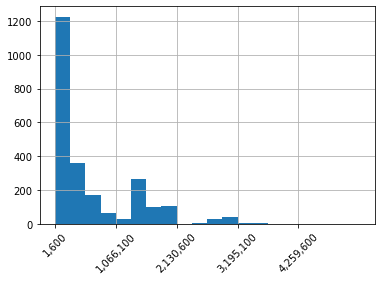

In [41]:
df_copy = df
display(df_copy)

df_copy["Number of Jobs, 2019"] = df_copy["Number of Jobs, 2019"].astype('int')

df_copy["Number of Jobs, 2019"].hist(bins=20)
max_ = df_copy["Number of Jobs, 2019"].max()
min_ = df_copy["Number of Jobs, 2019"].min()
step = int((max_-min_)/5)
ticks = np.arange(min_, max_, step=step)
plt.xticks(ticks, ["{:,}".format(x) for x in ticks], rotation=45)

plt.show()

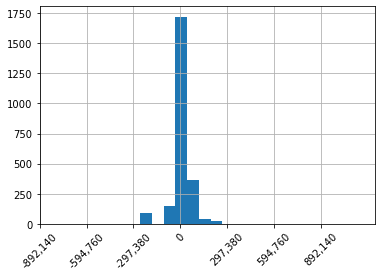

In [42]:
df_copy["Employment Change, 2019-29"] = df_copy["Employment Change, 2019-29"].astype('int')

df_copy["Employment Change, 2019-29"].hist(bins=20)
max_ = df_copy["Employment Change, 2019-29"].max()
min_ = df_copy["Employment Change, 2019-29"].min()
step = int((max_-min_)/5)
# ticks = np.arange(min_, max_, step=step)
ticks = [x*step for x in range(-3,4)]
plt.xticks(ticks, ["{:,}".format(x) for x in ticks], rotation=45)

plt.show()